In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
!pip install mailbox

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
import mailbox
mboxfile = "gdrive/My Drive/Colab Notebooks/gmail.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [32]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Subject
From
To
Reply-To
Date
MIME-Version
Content-Type
X-Mailer
X-Complaints-To
X-Feedback-ID
List-Unsubscribe
Message-ID


In [0]:
import csv

with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])
    
  for message in mbox:
    writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [0]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [108]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [0]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [0]:
dfs = dfs[dfs['date'].notna()]

In [0]:
dfs.to_csv('gmail.csv')

In [112]:
dfs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37554 entries, 1 to 78442
Data columns (total 6 columns):
subject    37367 non-null object
from       37554 non-null object
date       37554 non-null datetime64[ns, UTC]
to         36882 non-null object
label      36962 non-null object
thread     37554 non-null object
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 2.0+ MB


In [113]:
dfs.head(10)

,subject,from,date,to,label,thread
1,New Books: The Python Journeyman + Understandi...,"""James @ SitePoint"" <james@sitepoint.com>",2019-09-20 14:07:05+00:00,"""Suresh KUMAR Mukhiya"" <itsmeskm99@gmail.com>","Inbox,Category Promotions,Unread",1645216686186738105
2,iPhone 11 Pro og iPhone 11 er her,Apple <News_Europe@InsideApple.Apple.com>,2019-09-20 10:33:27+00:00,itsmeskm99@gmail.com,"Inbox,Category Promotions,Unread",1645190169696380553
3,=?utf-8?Q?Save=20on=20Burlap=20Bags=20Today=21...,=?utf-8?Q?Tote=20Bag=20Factory?= <support@tote...,2019-09-20 15:32:31+00:00,<itsmeskm99@gmail.com>,"Inbox,Category Promotions,Unread",1645209548975264659
4,"Hi there, looking for the best Dashain deals? ...",=?ISO-8859-1?B?RGFyYXogTlA=?= <info@email.dara...,2019-09-17 06:19:10+00:00,itsmeskm99@gmail.com,"Inbox,Category Promotions,Unread",1644916038153843699
5,The file =?UTF-8?B?J0JyYW5kX0Jvb2sgdGVzdC5wZGY...,"""Box Updates"" <noreply@box.com>",2019-09-20 19:04:16+00:00,itsmeskm99@gmail.com,"Inbox,Opened,Category Updates",1645222431795507661
6,We miss you on Google Maps,Google Local Guides <noreply-local-guides@goog...,2019-09-20 11:19:56+00:00,itsmeskm99@gmail.com,"Important,Trash,Category Updates,Unread",1645193091278294372
7,=?utf-8?B?VGFrZSB5b3VyIHNraWxscyB0byB0aGUgbmV4...,edX <news@edx.org>,2019-09-17 13:32:49+00:00,itsmeskm99@gmail.com,"Inbox,Opened,Category Promotions",1644929668040204207
8,Freelancing 101: How to Market a Small Business,"""Shopify Partner Blog"" <partners@email.shopify...",2019-09-17 14:10:12+00:00,<itsmeskm99@gmail.com>,"Inbox,Category Promotions,Unread",1644932013373411638
9,"Suresh KUMAR, your profile is getting hits",=?UTF-8?B?TGlua2VkSW4=?= <linkedin@e.linkedin....,2019-09-17 17:29:38+00:00,itsmeskm99@gmail.com,"Inbox,Opened,Category Social",1644955879306685021
10,=?UTF-8?Q?Forget_FOMO_=E2=80=93_you_can_go_bac...,Flatiron School <info@flatironschool.com>,2019-09-19 18:01:13+00:00,itsmeskm99@gmail.com,"Inbox,Category Promotions,Unread",1645127741920169127


In [114]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [0]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [0]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [0]:
myemail = 'itsmeskm99@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [0]:
dfs.drop(columns='to', inplace=True)

In [119]:
dfs.head(10)

,subject,from,date,label,thread
1,New Books: The Python Journeyman + Understandi...,james@sitepoint.com,2019-09-20 14:07:05+00:00,inbox,1645216686186738105
2,iPhone 11 Pro og iPhone 11 er her,News_Europe@InsideApple.Apple.com,2019-09-20 10:33:27+00:00,inbox,1645190169696380553
3,=?utf-8?Q?Save=20on=20Burlap=20Bags=20Today=21...,support@totebagfactory.com,2019-09-20 15:32:31+00:00,inbox,1645209548975264659
4,"Hi there, looking for the best Dashain deals? ...",info@email.daraz.com.np,2019-09-17 06:19:10+00:00,inbox,1644916038153843699
5,The file =?UTF-8?B?J0JyYW5kX0Jvb2sgdGVzdC5wZGY...,noreply@box.com,2019-09-20 19:04:16+00:00,inbox,1645222431795507661
6,We miss you on Google Maps,noreply-local-guides@google.com,2019-09-20 11:19:56+00:00,inbox,1645193091278294372
7,=?utf-8?B?VGFrZSB5b3VyIHNraWxscyB0byB0aGUgbmV4...,news@edx.org,2019-09-17 13:32:49+00:00,inbox,1644929668040204207
8,Freelancing 101: How to Market a Small Business,partners@email.shopify.com,2019-09-17 14:10:12+00:00,inbox,1644932013373411638
9,"Suresh KUMAR, your profile is getting hits",linkedin@e.linkedin.com,2019-09-17 17:29:38+00:00,inbox,1644955879306685021
10,=?UTF-8?Q?Forget_FOMO_=E2=80=93_you_can_go_bac...,info@flatironschool.com,2019-09-19 18:01:13+00:00,inbox,1645127741920169127


In [0]:
import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [0]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [0]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.weekday_name)
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [0]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [0]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [0]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [0]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [0]:
dfs.index = dfs['date']
del dfs['date']

In [128]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Tue, 24 May 2011 11:04 AM
Fri, 20 Sep 2019 03:04 PM
inbox    32952
sent      4602
Name: label, dtype: int64


In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [0]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [0]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

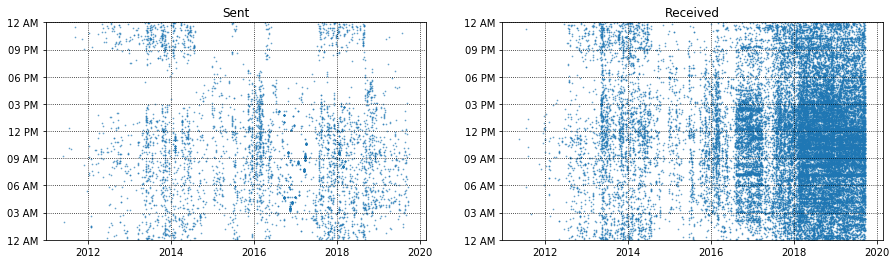

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [0]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [0]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [0]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

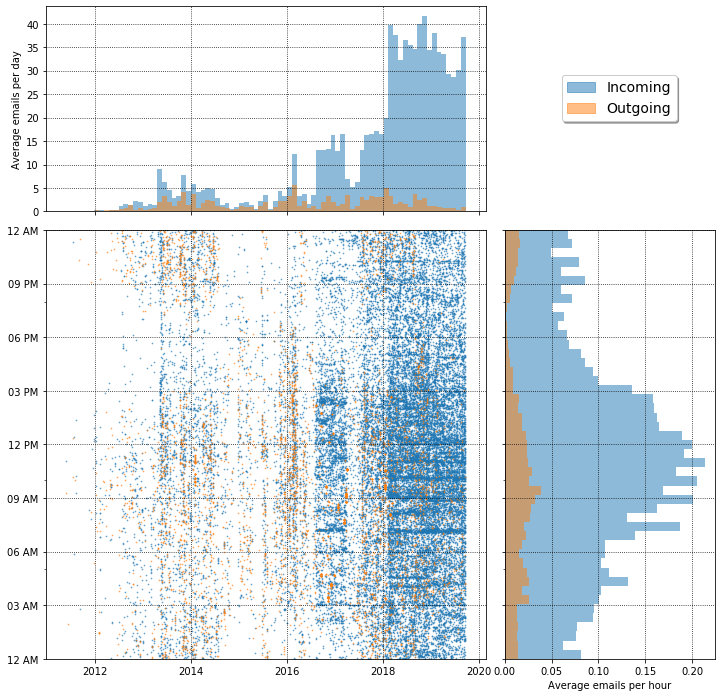

In [145]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

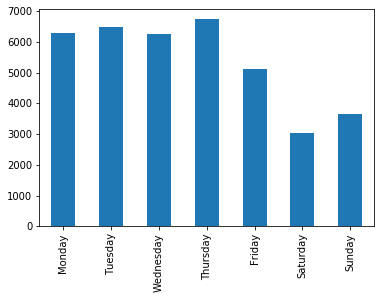

In [148]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [0]:
addrs = received['from'].value_counts()

addrs[0:4]

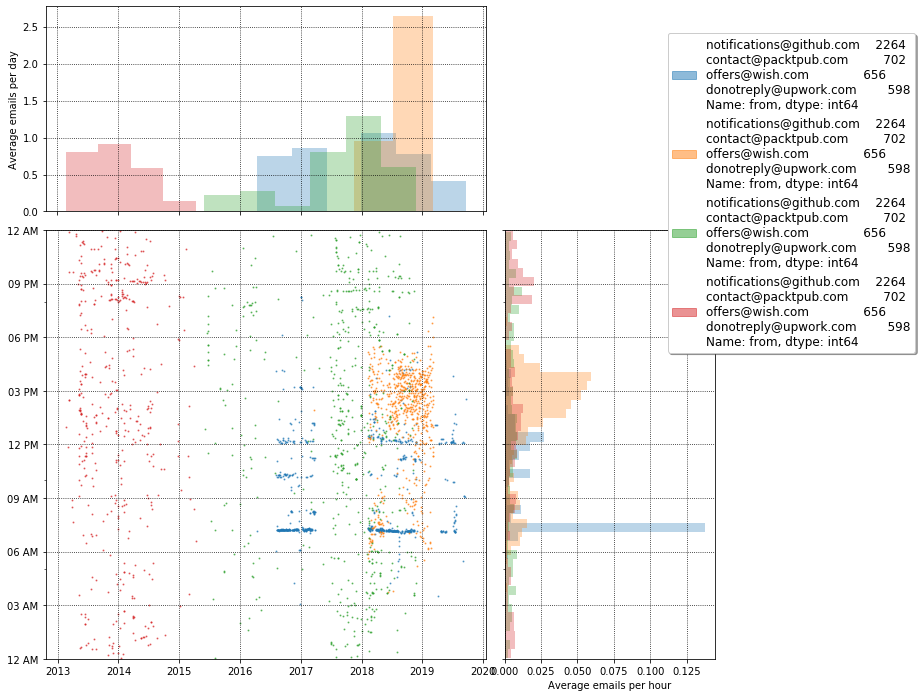

In [149]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

In [0]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

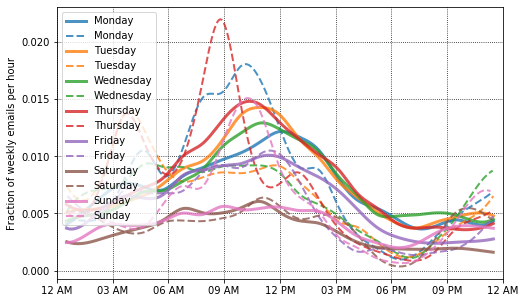

In [150]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')


In [0]:
from wordcloud import WordCloud 

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

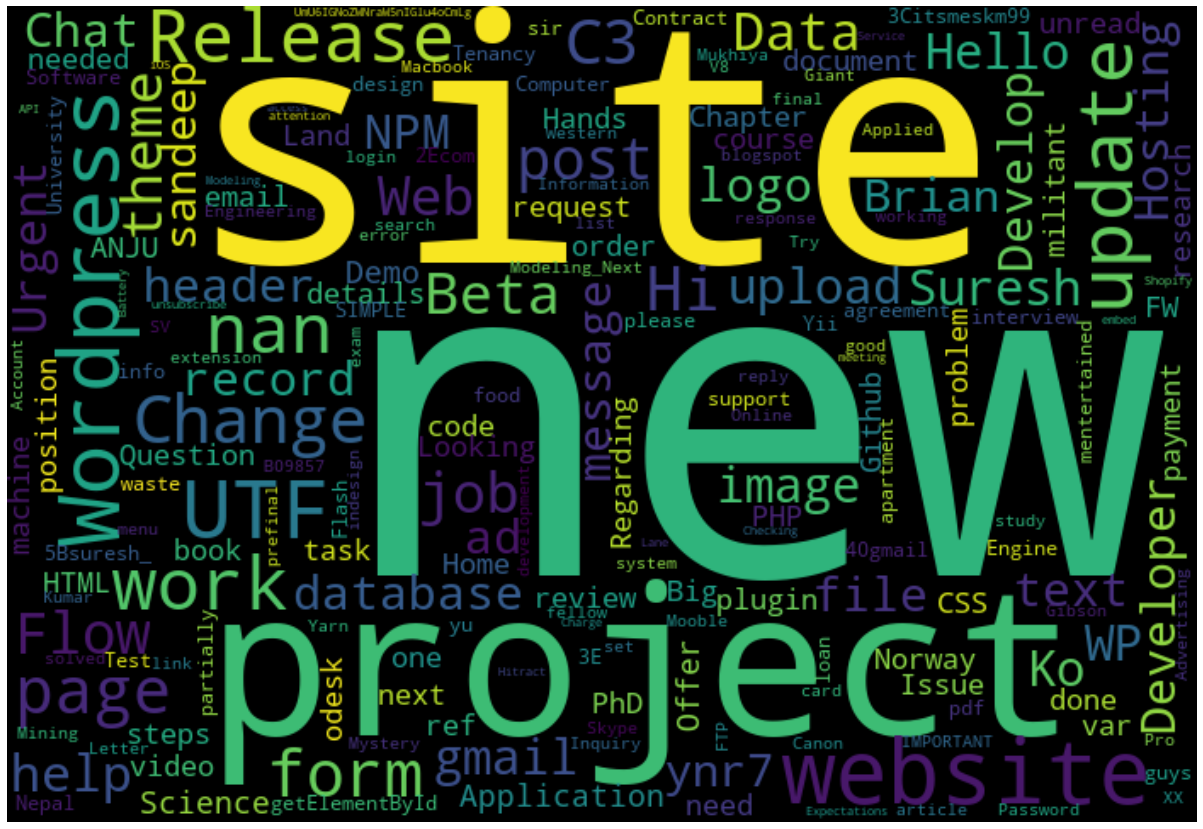

In [153]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)